In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.preprocessing import OneHotEncoder, StandardScaler


In [31]:
import gdown
import pandas as pd
file_id = '1pyuTsv4A3N43ghvfEG_C4qqGDgoVn_1n'
download_url = f'https://drive.google.com/uc?id={file_id}'
output_file = 'empathy_responses_analysis.csv'
gdown.download(download_url, output_file, quiet=False)
df = pd.read_csv(output_file)
print(df.head())

Downloading...
From: https://drive.google.com/uc?id=1pyuTsv4A3N43ghvfEG_C4qqGDgoVn_1n
To: /content/empathy_responses_analysis.csv
100%|██████████| 1.55k/1.55k [00:00<00:00, 4.18MB/s]

   respondent_id  age  gender  ...     response_18               response_19     response_20
0              1   25    Male  ...  Happy for them     Offer help or support           Agree
1              2   30  Female  ...     Indifferent   Feel sad but do nothing         Neutral
2              3   22    Male  ...   Proud of them  Motivated to take action  Strongly agree
3              4   28  Female  ...         Jealous                 Ignore it        Disagree
4              5   35    Male  ...  Happy for them     Offer help or support           Agree

[5 rows x 24 columns]


In [32]:
df = df.dropna()
df['gender'] = df['gender'].str.lower()

In [33]:
categorical_features = ['gender', 'location'] + [f'response_{i}' for i in range(1, 21)]
encoder = OneHotEncoder(sparse_output=False)
encoded_features = encoder.fit_transform(df[categorical_features])

In [34]:
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_features))

# Drop the original categorical columns and concatenate the encoded features
df = df.drop(categorical_features, axis=1)
df = pd.concat([df, encoded_df], axis=1)


In [35]:
# Normalize or standardize numerical data
numerical_features = ['age']
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

In [36]:
# Display the cleaned and transformed DataFrame
print("Cleaned and Transformed DataFrame:")
print(df.head())

Cleaned and Transformed DataFrame:
   respondent_id       age  ...  response_20_Neutral  response_20_Strongly agree
0              1 -0.677631  ...                  0.0                         0.0
1              2  0.451754  ...                  1.0                         0.0
2              3 -1.355262  ...                  0.0                         1.0
3              4  0.000000  ...                  0.0                         0.0
4              5  1.581139  ...                  0.0                         0.0

[5 rows x 88 columns]


In [37]:
# Save the cleaned and transformed dataset
df.to_csv('cleaned_transformed_empathy_responses.csv', index=False)

print("Data cleaning and transformation complete. Cleaned dataset saved as 'cleaned_transformed_empathy_responses.csv'")

Data cleaning and transformation complete. Cleaned dataset saved as 'cleaned_transformed_empathy_responses.csv'


In [38]:
from google.colab import files
files.download('cleaned_transformed_empathy_responses.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [39]:
# Load the cleaned and transformed dataset
df = pd.read_csv('cleaned_transformed_empathy_responses.csv')

# Display the first few rows of the dataframe to understand its structure
print("Cleaned and Transformed DataFrame:")
print(df.head())

# Function to plot distributions of empathy responses based on demographic factors
def plot_distributions(df, feature, title):
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x=feature, kde=True)
    plt.title(title)
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

Cleaned and Transformed DataFrame:
   respondent_id       age  ...  response_20_Neutral  response_20_Strongly agree
0              1 -0.677631  ...                  0.0                         0.0
1              2  0.451754  ...                  1.0                         0.0
2              3 -1.355262  ...                  0.0                         1.0
3              4  0.000000  ...                  0.0                         0.0
4              5  1.581139  ...                  0.0                         0.0

[5 rows x 88 columns]


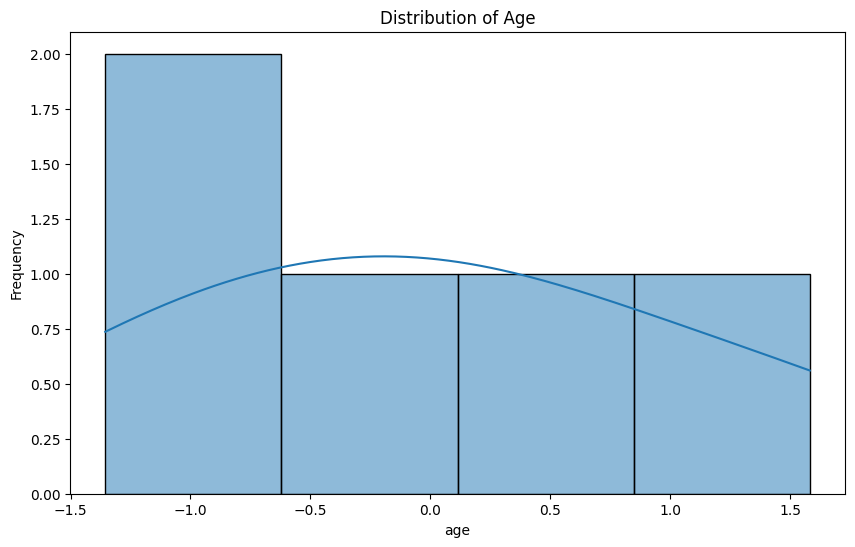

In [40]:
# Plot distributions of age
plot_distributions(df, 'age', 'Distribution of Age')

In [41]:
# Function to plot average empathy scores based on demographic factors
def plot_average_scores(df, demographic_feature, score_features, title):
    avg_scores = df.groupby(demographic_feature)[score_features].mean().reset_index()
    avg_scores = avg_scores.melt(id_vars=[demographic_feature], var_name='Question', value_name='Average Score')

    plt.figure(figsize=(14, 8))
    sns.barplot(data=avg_scores, x=demographic_feature, y='Average Score', hue='Question')
    plt.title(title)
    plt.xlabel(demographic_feature)
    plt.ylabel('Average Score')
    plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
    plt.show()

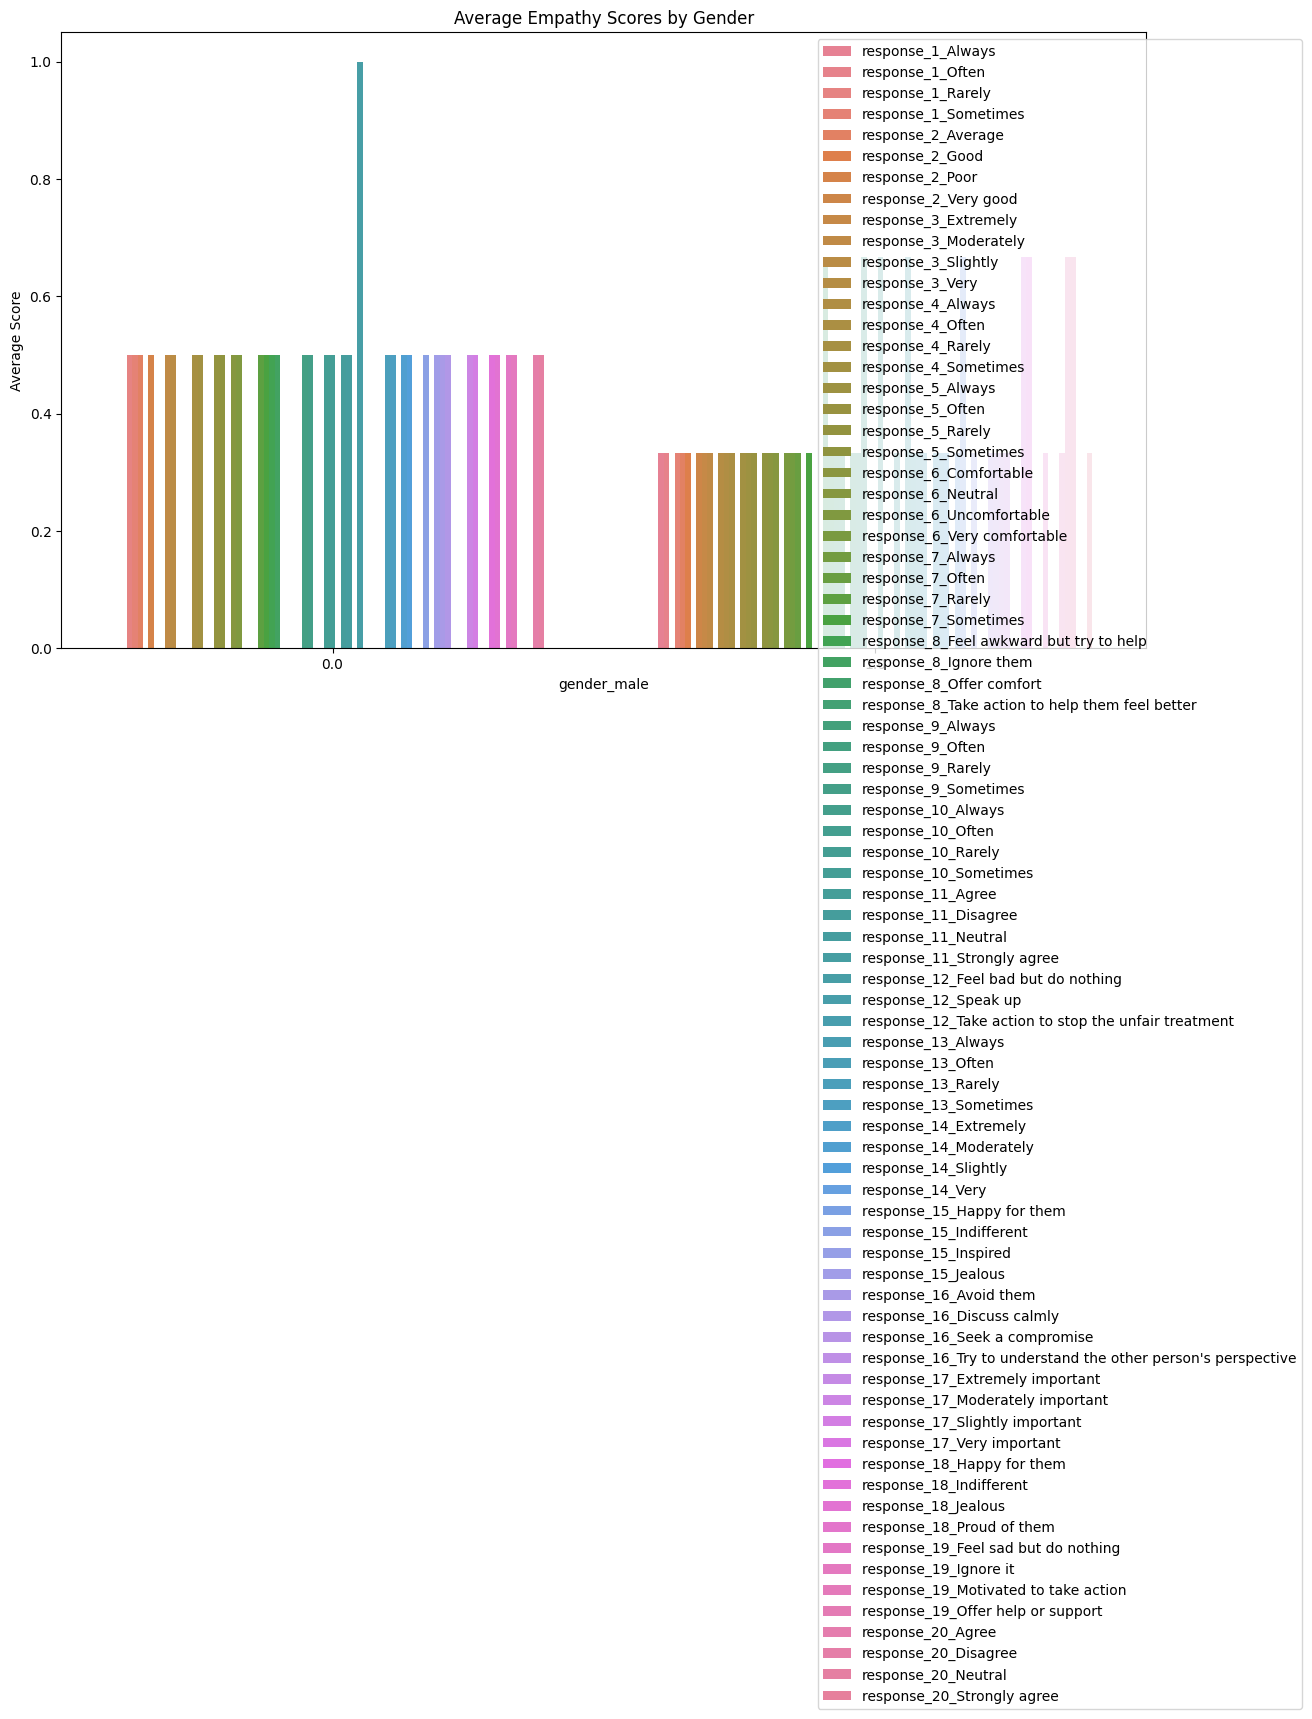

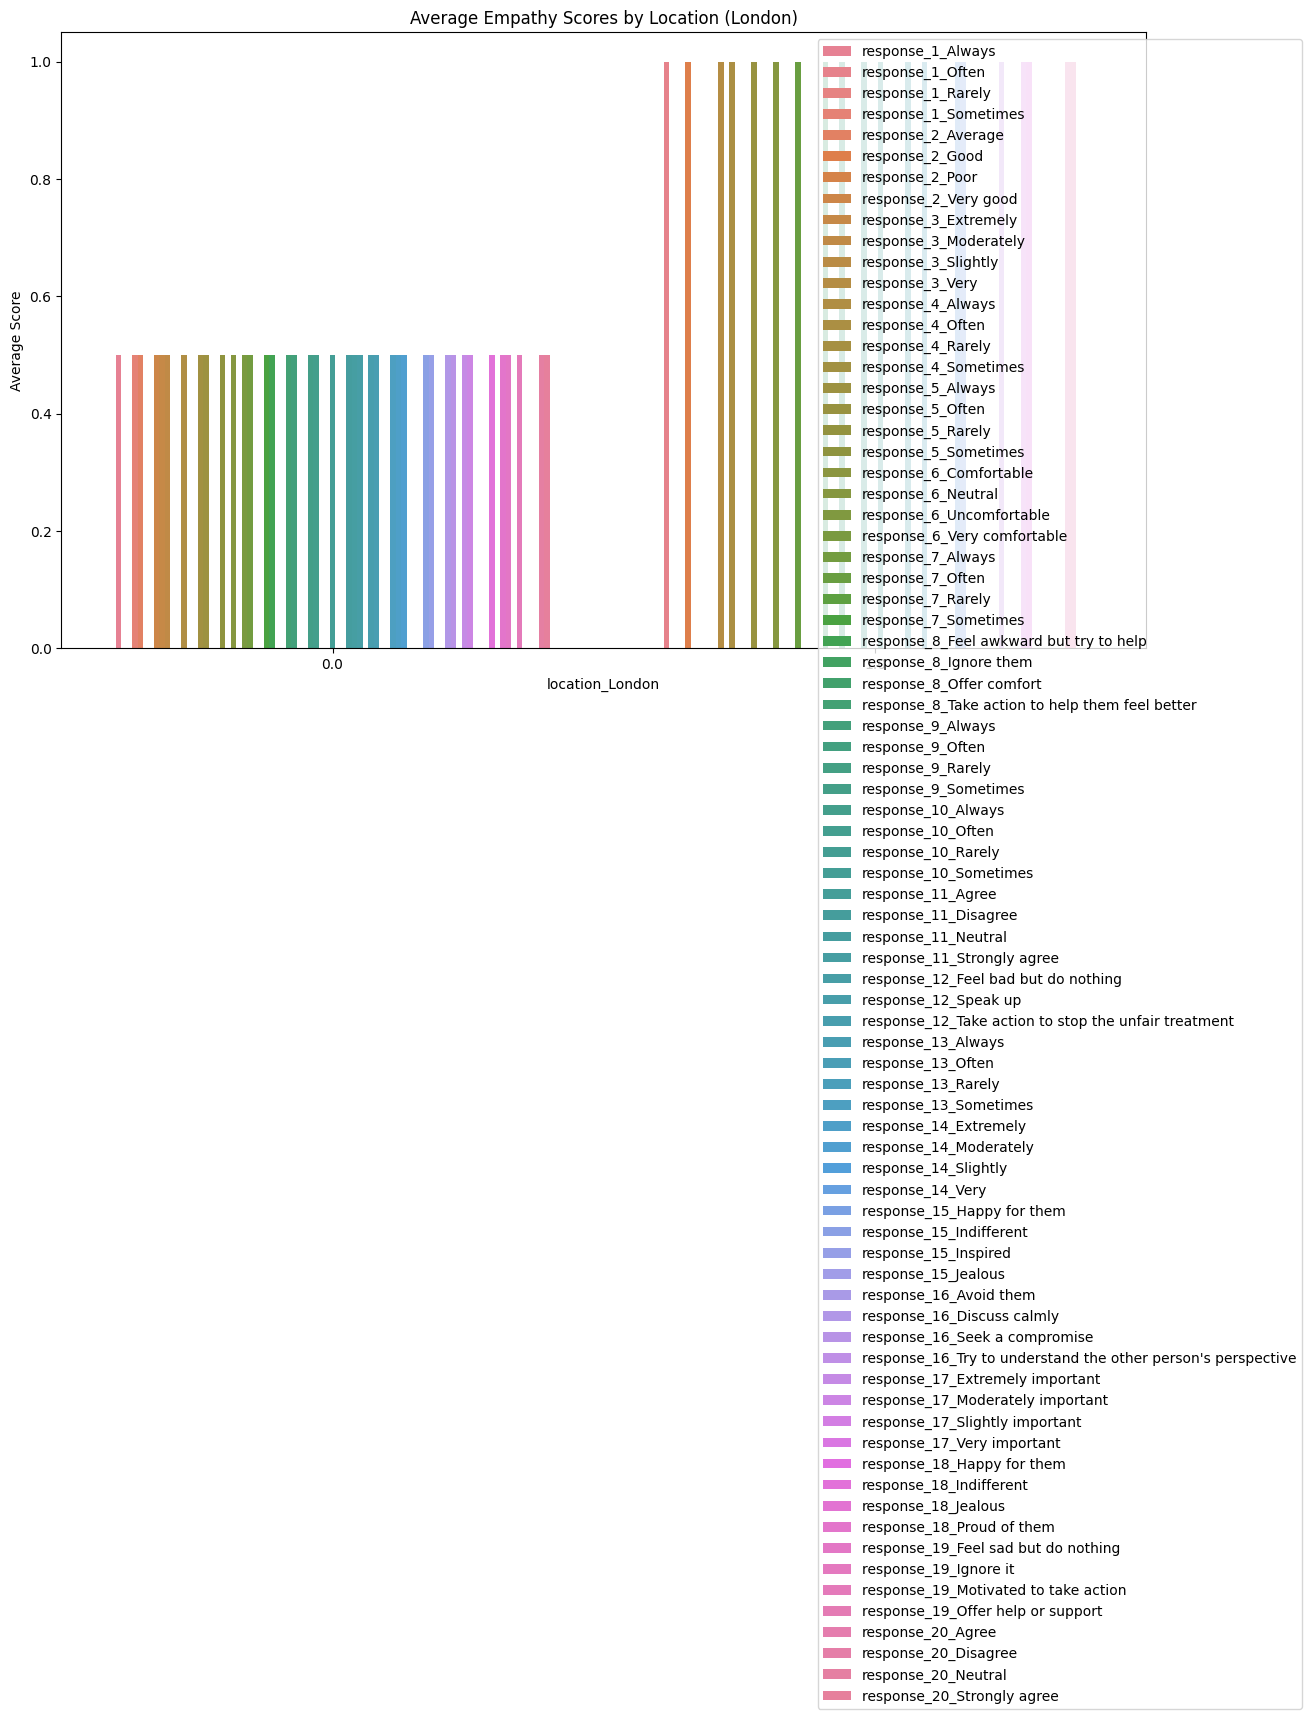

In [42]:
# List of encoded response features
response_features = [col for col in df.columns if col.startswith('response_')]

# Plot average empathy scores based on gender
plot_average_scores(df, 'gender_male', response_features, 'Average Empathy Scores by Gender')

# Plot average empathy scores based on location (example with a few locations)
selected_locations = ['location_London', 'location_Manchester', 'location_Birmingham']
df_selected_locations = df[df[selected_locations].any(axis=1)]
plot_average_scores(df_selected_locations, 'location_London', response_features, 'Average Empathy Scores by Location (London)')

# Statistical Analysis: ANOVA to compare empathy levels across different age groups
# Create age groups
df['age_group'] = pd.cut(df['age'], bins=[20, 25, 30, 35, 40], labels=['20-25', '25-30', '30-35', '35-40'])


In [43]:
# Perform ANOVA
anova_results = {}
for feature in response_features:
    anova = stats.f_oneway(
        df[df['age_group'] == '20-25'][feature],
        df[df['age_group'] == '25-30'][feature],
        df[df['age_group'] == '30-35'][feature],
        df[df['age_group'] == '35-40'][feature]
    )
    anova_results[feature] = anova

# Display ANOVA results
print("\nANOVA Results:")
for feature, result in anova_results.items():
    print(f"{feature}: F-statistic={result.statistic:.2f}, p-value={result.pvalue:.4f}")

# Interpretation: If p-value < 0.05, there is a significant difference in empathy levels across age groups for that question

/usr/local/lib/python3.11/dist-packages/scipy/stats/_stats_py.py:4102: DegenerateDataWarning: at least one input has length 0
  if _f_oneway_is_too_small(samples):



ANOVA Results:
response_1_Always: F-statistic=nan, p-value=nan
response_1_Often: F-statistic=nan, p-value=nan
response_1_Rarely: F-statistic=nan, p-value=nan
response_1_Sometimes: F-statistic=nan, p-value=nan
response_2_Average: F-statistic=nan, p-value=nan
response_2_Good: F-statistic=nan, p-value=nan
response_2_Poor: F-statistic=nan, p-value=nan
response_2_Very good: F-statistic=nan, p-value=nan
response_3_Extremely: F-statistic=nan, p-value=nan
response_3_Moderately: F-statistic=nan, p-value=nan
response_3_Slightly: F-statistic=nan, p-value=nan
response_3_Very: F-statistic=nan, p-value=nan
response_4_Always: F-statistic=nan, p-value=nan
response_4_Often: F-statistic=nan, p-value=nan
response_4_Rarely: F-statistic=nan, p-value=nan
response_4_Sometimes: F-statistic=nan, p-value=nan
response_5_Always: F-statistic=nan, p-value=nan
response_5_Often: F-statistic=nan, p-value=nan
response_5_Rarely: F-statistic=nan, p-value=nan
response_5_Sometimes: F-statistic=nan, p-value=nan
response_6_

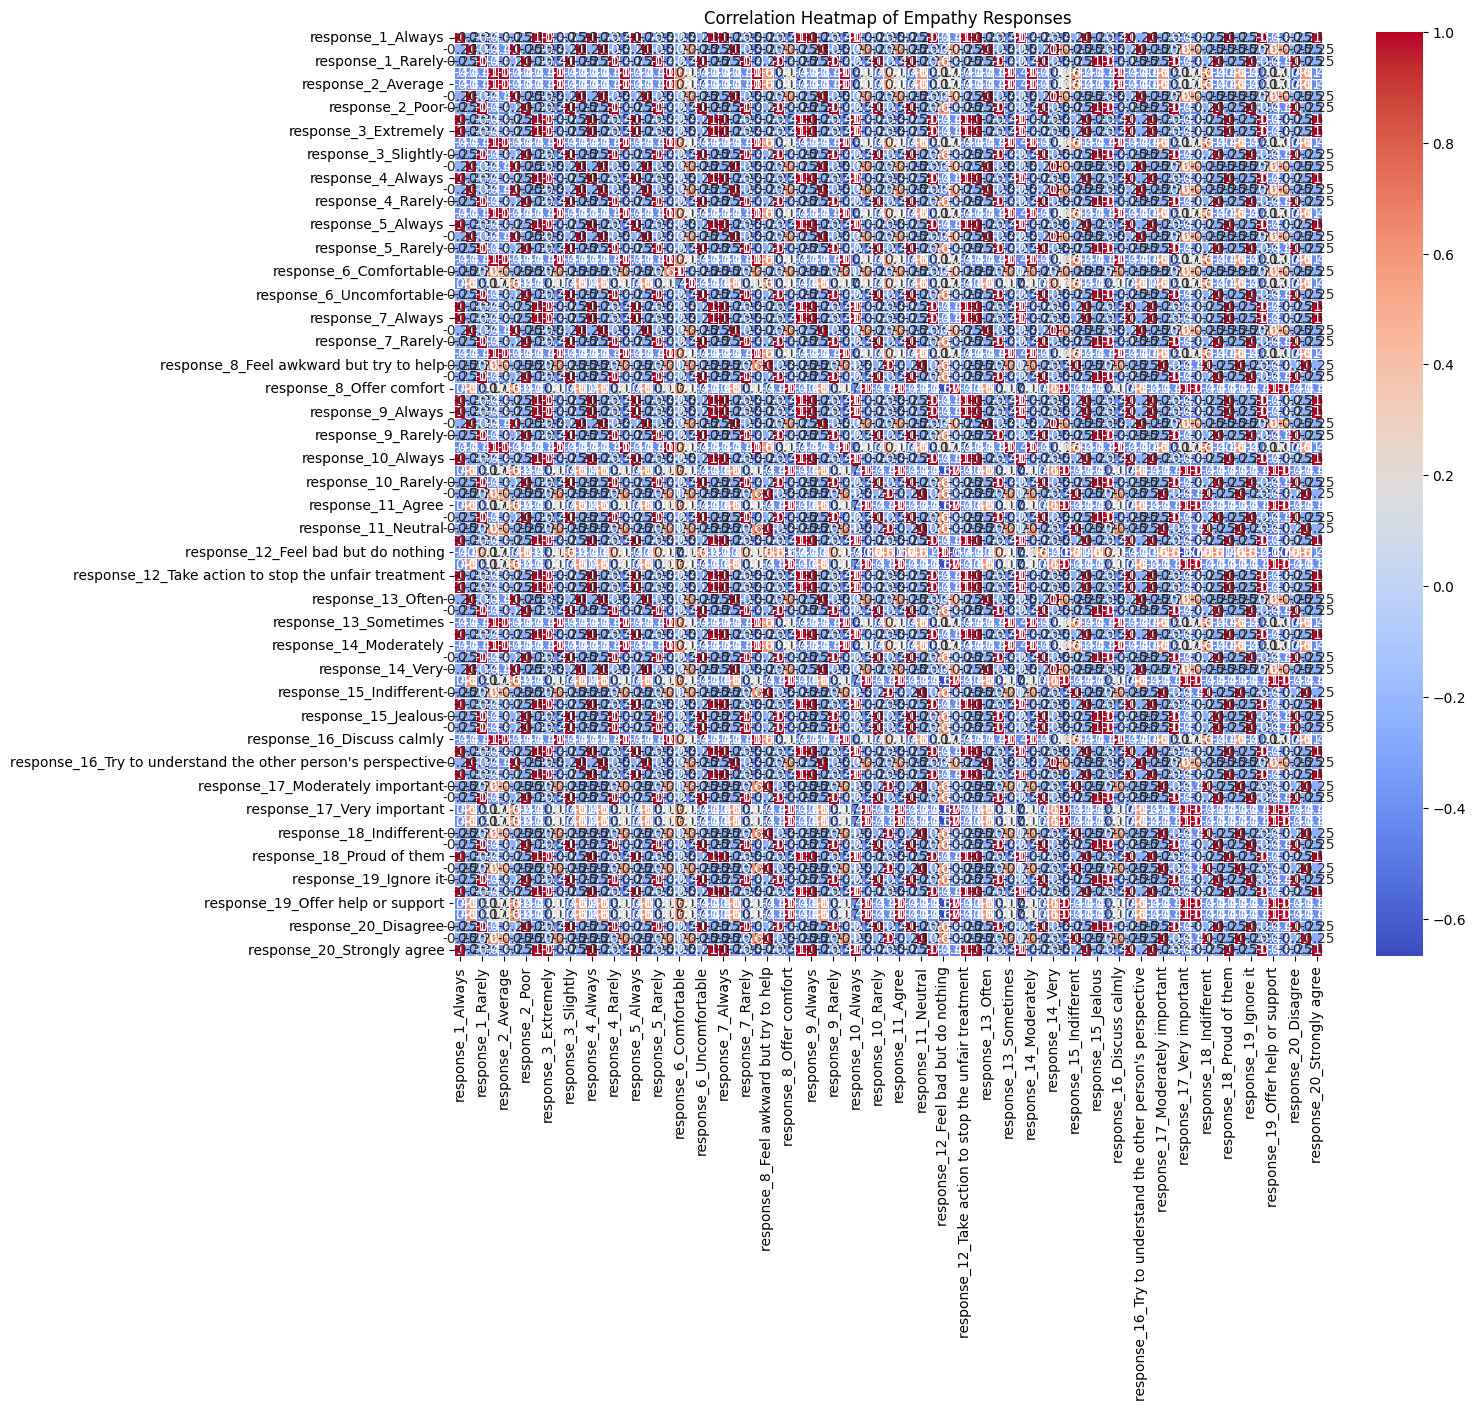

In [44]:
def plot_correlation_heatmap(df, features, title):
    plt.figure(figsize=(14, 12))
    correlation_matrix = df[features].corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title(title)
    plt.show()

# Plot correlation heatmap of empathy responses
plot_correlation_heatmap(df, response_features, 'Correlation Heatmap of Empathy Responses')

In [45]:
def plot_box_plots(df, demographic_feature, score_features, title):
    melted_df = df.melt(id_vars=[demographic_feature], value_vars=score_features, var_name='Question', value_name='Score')

    plt.figure(figsize=(14, 8))
    sns.boxplot(data=melted_df, x=demographic_feature, y='Score', hue='Question')
    plt.title(title)
    plt.xlabel(demographic_feature)
    plt.ylabel('Score')
    plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
    plt.show()

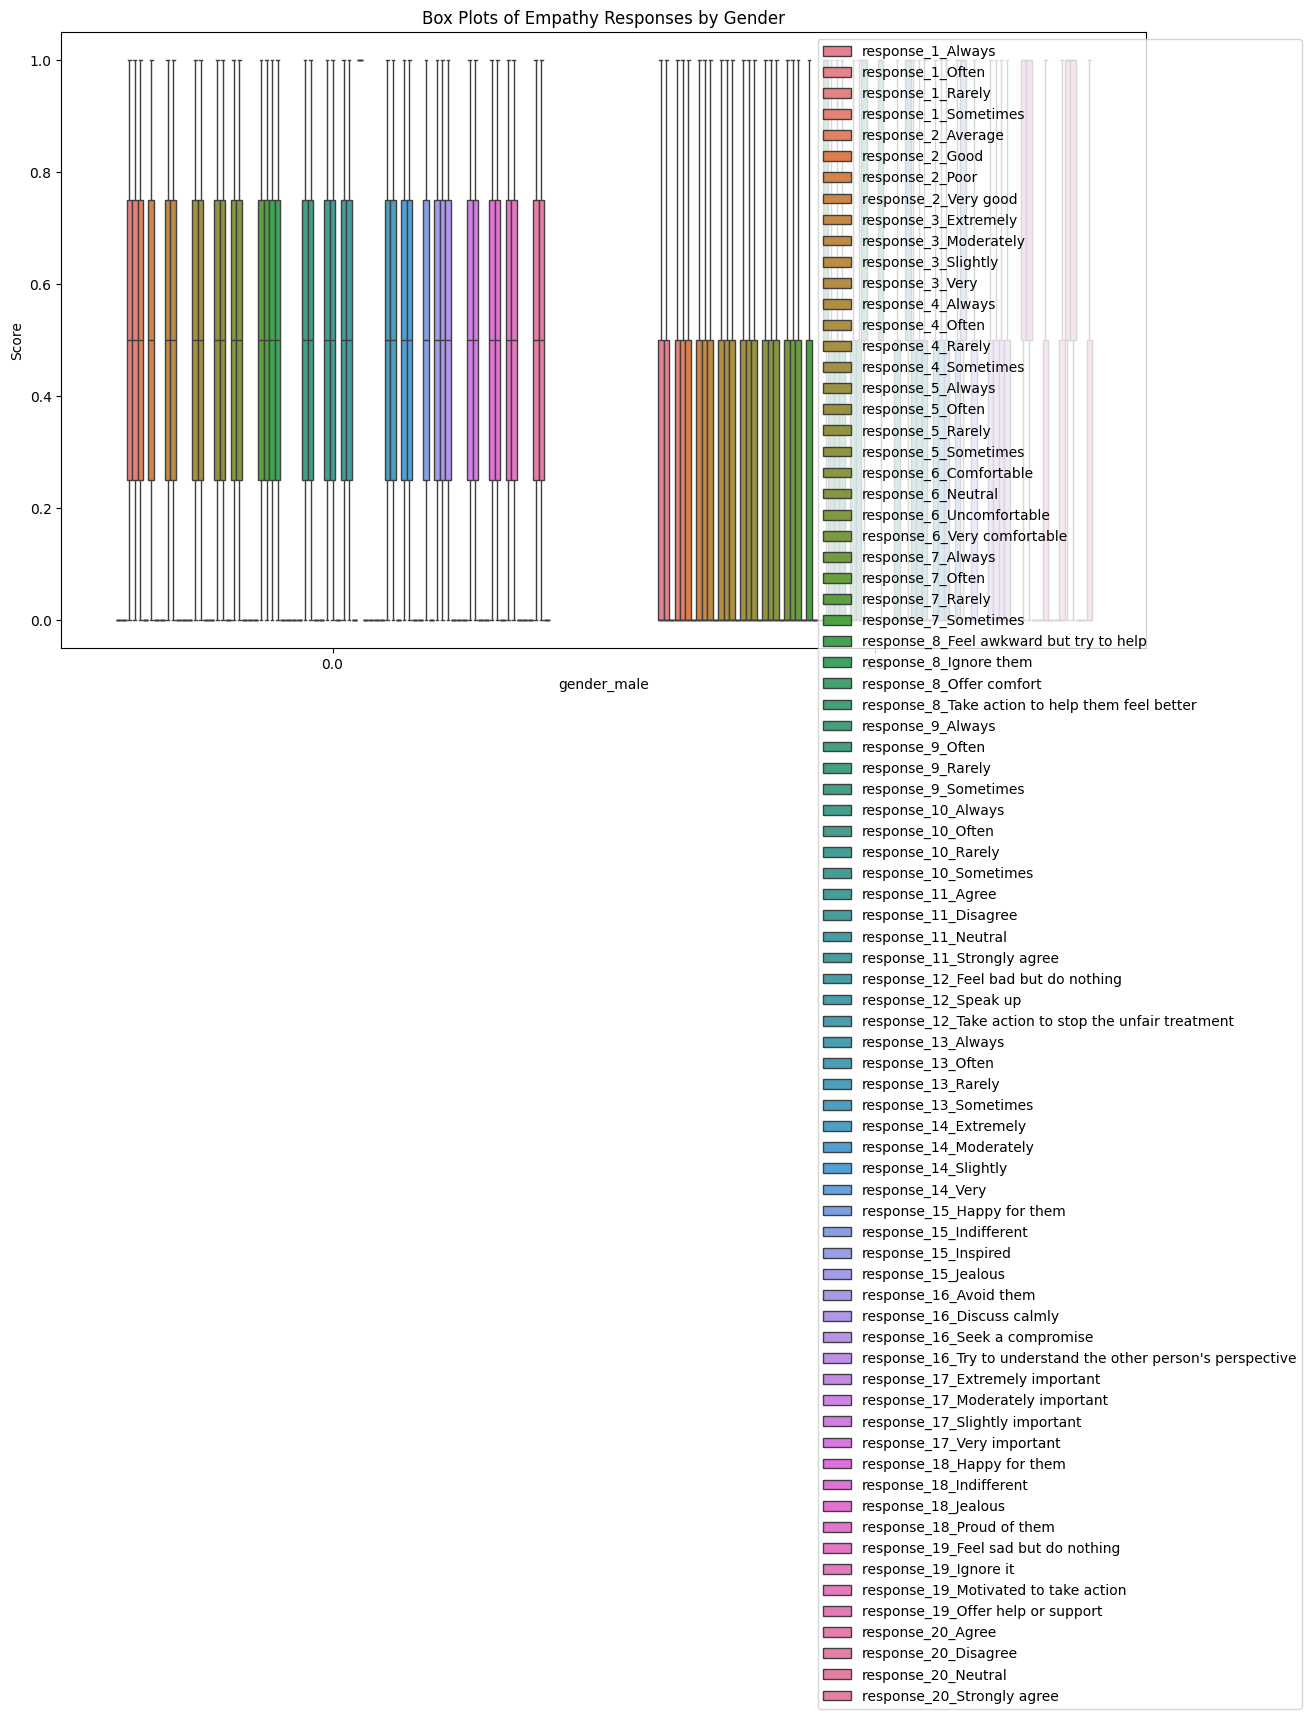

In [46]:
plot_box_plots(df, 'gender_male', response_features, 'Box Plots of Empathy Responses by Gender')



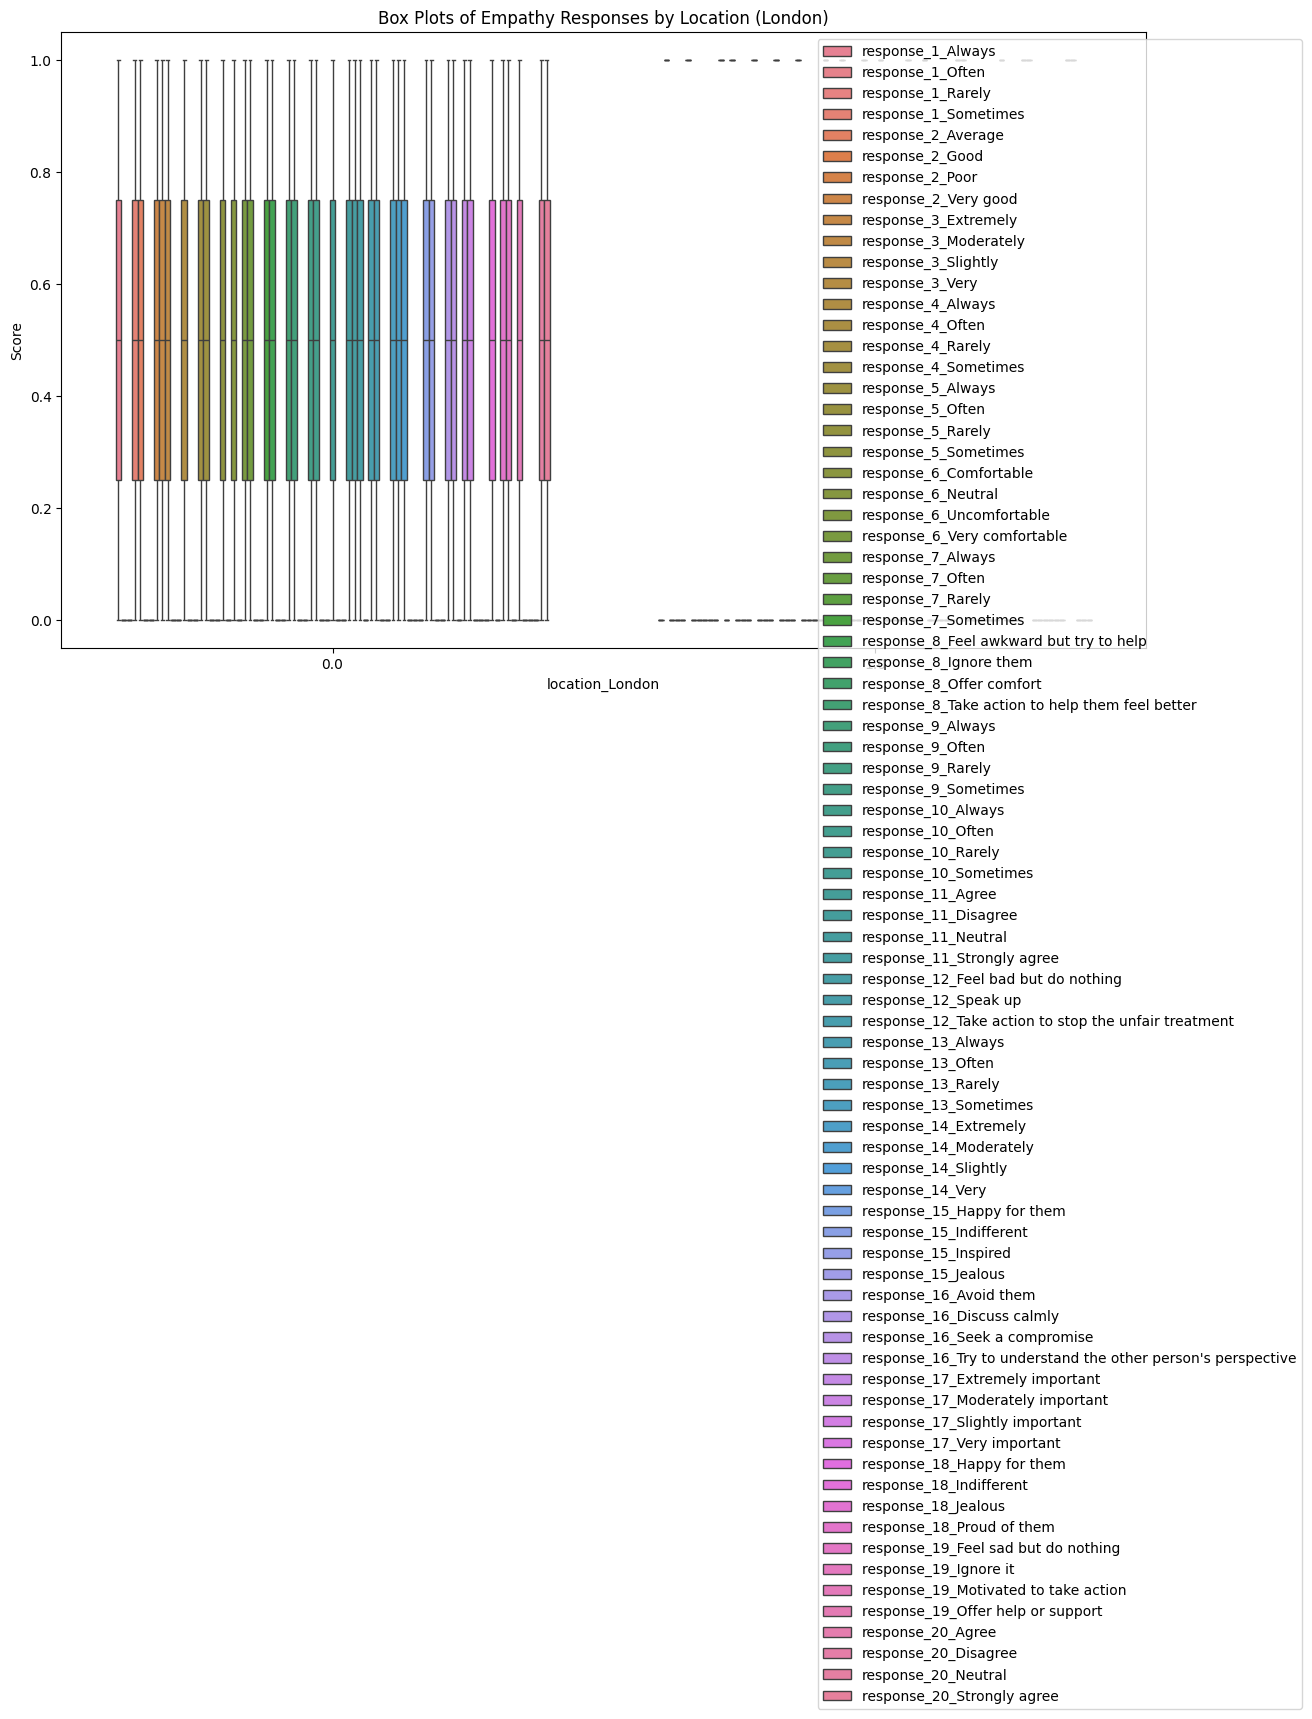

In [47]:
plot_box_plots(df_selected_locations, 'location_London', response_features, 'Box Plots of Empathy Responses by Location (London)')